#### [ 산점도 - 버블 그래프 ]
- 두 개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형)데이터에 사용함

In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
F_DATA=r'C:\Users\kdp\Desktop\KDW\EX_PANDAS06\DATA\auto_mpg.csv'

In [4]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
# - 컬럼별 타입 화긴
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)

-0.83

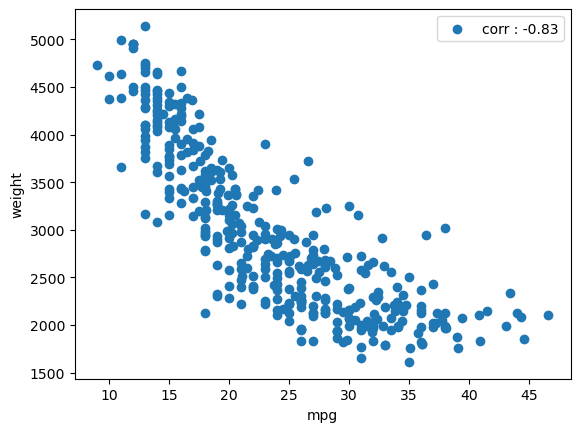

In [7]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight,label=f'corr : {round(corrSR["weight"],2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()


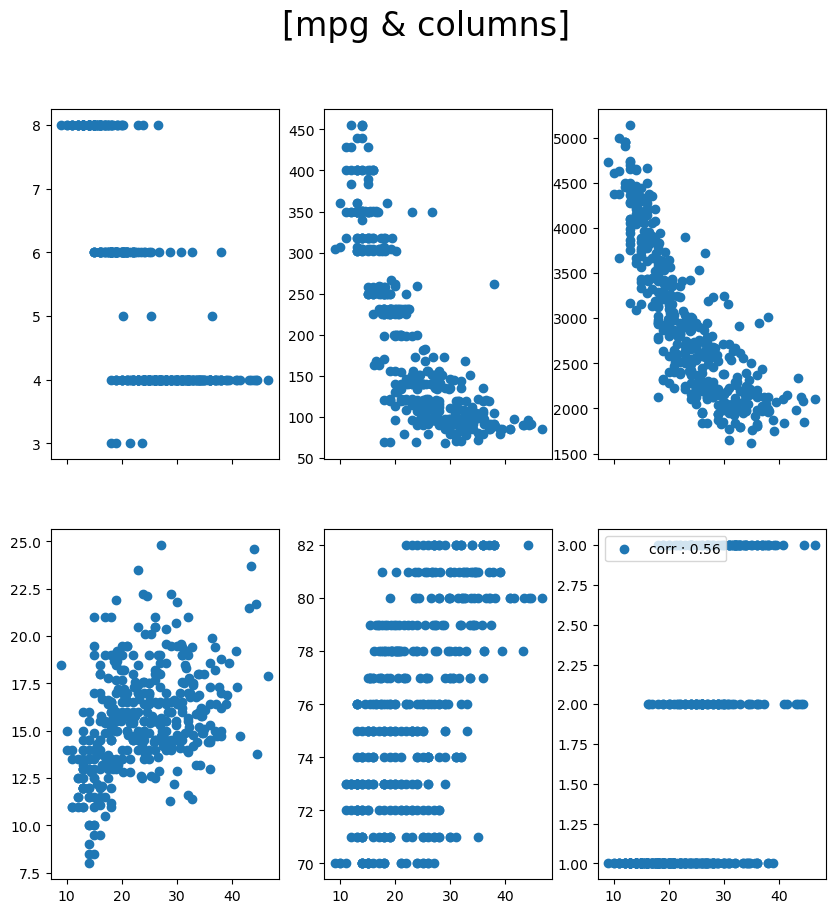

In [8]:
# - [4-3] mpg컬럼과 다른 컬럼간의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(10,10))

# - (2) 그래프 담을 공간 생성 axes
axs=fig.subplots(2,3,sharex=True)

for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],dataDF[col_name], label=f'corr : {round(corrSR[col_name],2)}')
fig.suptitle("[mpg & columns]", fontsize=24)        
plt.legend()
plt.show()




- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수 반비례 관계

In [17]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

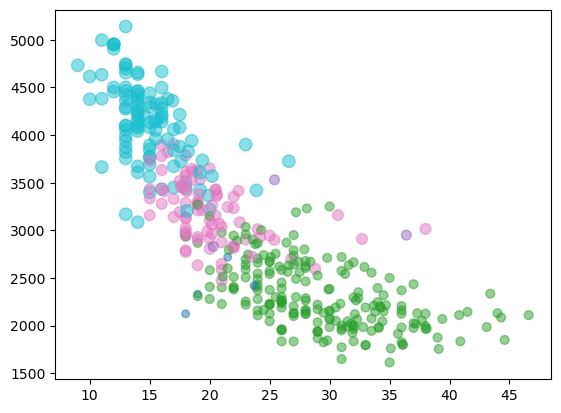

In [24]:
# - mpg와 weight 관계 산점도(scatter) 시각화
plt.scatter(dataDF.mpg, dataDF.weight, 
            s=dataDF['cylinders']*10, 
            c=[dataDF['cylinders']],
            cmap='tab10',
            alpha=0.5)
plt.xlabel=('mpg')
plt.ylabel=('weight')
plt.show()